# Working with NLTK and spacy

In this notebook we'll do some analyses of the files we got from the COVID19 IIPC collection. It is based on the [original code from Nick Ruest and the Archive Unleashed team](https://github.com/archivesunleashed/notebooks).


# Loading our website content Datasets as DataFrames

---



Next, we'll setup our datasets as pandas DataFrames to work with, and show a preview of each using the Data Table Display.

Each block of derivative commands create a variable. That variable is a DataFrame with all of the information from a given derivative. After the DataFrame is created, a preview of it is shown.

Provides the following columns:

* crawl date
* web domain
* URL
* MIME type as provided by the web server
* MIME type as detected by Apache TIKA
* content (HTTP headers and HTML removed)

**This file is HUGE! Be patient!**

In [1]:
import pandas as pd

In [2]:
web_pages = pd.read_csv("data/web-pages.csv")
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content
0,20120118,amazon.com,http://rcm.amazon.com/e/cm?lt1=_blank&bc1=0000...,text/html,NaN,NaN,NaN
1,20120118,feedburner.com,http://feeds.feedburner.com/QuoteSnack,text/html,text/html,en,"Stop SOPA! If Congress passes SOPA, the Intern..."
2,20120118,thedeadcrows.com,http://thedeadcrows.com/sopa.html,text/html,application/xhtml+xml,en,STOP SOPA! STOP SOPA! STOP SOPA! This site has...
3,20120118,youtube.com,http://www.youtube.com/embed/WU_gZNVfuf0?wmode...,text/html,text/html,en,Life in a Day Soundtrack - Angolan Women - You...
4,20120118,selectivism.com,http://selectivism.com/2010/02/,text/html,application/xhtml+xml,en,2010 February : Selectivism ABOUT TIP-OFF CON...
...,...,...,...,...,...,...,...
219987,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/sites/al...,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...
219988,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/sites/al...,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...
219989,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/0.8,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...
219990,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/form.new...,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...


# Text Analysis

Now that we have all of our datasets loaded up, we can begin to work with them!

In [3]:
import altair as alt

In [4]:
import re
import nltk

In [5]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/frederic.clavert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/frederic.clavert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/frederic.clavert/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

We'll drop the `NaN` values in our DataFrame to clean things up a bit.

In [7]:
web_pages = web_pages.dropna()
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content
1,20120118,feedburner.com,http://feeds.feedburner.com/QuoteSnack,text/html,text/html,en,"Stop SOPA! If Congress passes SOPA, the Intern..."
2,20120118,thedeadcrows.com,http://thedeadcrows.com/sopa.html,text/html,application/xhtml+xml,en,STOP SOPA! STOP SOPA! STOP SOPA! This site has...
3,20120118,youtube.com,http://www.youtube.com/embed/WU_gZNVfuf0?wmode...,text/html,text/html,en,Life in a Day Soundtrack - Angolan Women - You...
4,20120118,selectivism.com,http://selectivism.com/2010/02/,text/html,application/xhtml+xml,en,2010 February : Selectivism ABOUT TIP-OFF CON...
6,20120118,hackedgadgets.com,http://hackedgadgets.com/2007/02/,text/html,application/xhtml+xml,en,2007 February - Hacked Gadgets – DIY Tech Blo...
...,...,...,...,...,...,...,...
219986,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/sites/al...,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...
219987,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/sites/al...,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...
219988,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/sites/al...,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...
219989,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/0.8,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...


We need to set the [`mode.chained_assignment`](https://pandas.pydata.org/docs/user_guide/options.html?highlight=chained_assignment) to `None` now to silence some exception errors that will come up.

In [8]:
pd.options.mode.chained_assignment = None

Next, we'll setup a tokenizer which will split on words, and create a new column which is the tokenized text.

In [9]:
tokenizer = nltk.RegexpTokenizer(r"\w+")

In [10]:
web_pages["content_tokenized"] = web_pages["content"].map(tokenizer.tokenize)

Now well create a column with the tokenized value count.

In [11]:
web_pages["content_tokens"] = web_pages["content_tokenized"].apply(lambda x: len(x))

## Basic word count statistics with pandas!

Now we can use the power of pandas [Statisitcal functions](https://pandas.pydata.org/docs/user_guide/computation.html) to show us some basic statistics about the tokens.

**Mean**

In [12]:
web_pages["content_tokens"].mean()

464.13747648546405

**Standard deviation**


In [13]:
web_pages["content_tokens"].std()

1362.478220829752

**Max**

In [14]:
web_pages["content_tokens"].max()

133948

**Min**

In [15]:
web_pages["content_tokens"].min()

1

## Pages with most words

Let's create a bar chart that shows the pages with the most words. Here we can see the power of pandas at work, in terms of both analysis and visualization.

First, let's show the query to get the data for our chart.

In [16]:
word_count = (
    web_pages[["url", "content_tokens"]]
    .sort_values(by="content_tokens", ascending=False)
    .head(25)
)

In [17]:
word_count

,url,content_tokens
170605,http://www.clownantics.com/rss-feed.xml,133948
59670,http://www.dmlcompetition.net/Competition/4/wi...,100339
63643,http://tiddlywiki.org/,97475
195889,http://tiddlywiki.org/,97475
182703,http://en.wikipedia.org/wiki/Wikipedia:SOPA_in...,83717
42359,http://en.wikipedia.org/wiki/Wikipedia:SOPA_in...,83717
182069,http://en.wikipedia.org/wiki/Wikipedia:SOPA_in...,83717
58053,http://en.wikipedia.org/wiki/Wikipedia:SOPA_in...,83709
180619,http://en.wikipedia.org/wiki/Wikipedia:SOPA_in...,83664
47857,http://kverky.webs.com/index.html,51923


Next, let's create a bar chart of this.

In [18]:
word_count_bar = (
    alt.Chart(word_count)
    .mark_bar()
    .encode(x=alt.X("url:O", sort="-y"), y=alt.Y("content_tokens:Q"))
)

word_count_rule = (
    alt.Chart(word_count).mark_rule(color="red").encode(y="mean(content_tokens):Q")
)

word_count_text = word_count_bar.mark_text(align="center", baseline="bottom").encode(
    text="content_tokens:Q"
)

(word_count_bar + word_count_rule + word_count_text).properties(
    width=1400, height=700, title="Pages with the most words"
)

alt.LayerChart(...)

## How about NER on the page with the most tokens?

[Named-Entity Recognition](https://en.wikipedia.org/wiki/Named-entity_recognition), or NER, is an exciting field of natural language processing that lets us extract "entities" out of text; the names of people, locations, or organizations.

To do this, we first need to find the pages that have the most tokens.

In [19]:
word_count_max = (
    web_pages[["url", "content_tokens", "content"]]
    .sort_values(by="content_tokens", ascending=False)
    .head(1)
)
word_count_max["url"]

170605    http://www.clownantics.com/rss-feed.xml
Name: url, dtype: object

We'll remove the column width limit so we can check out our content for the page.

In [20]:
pd.set_option("display.max_colwidth", None)

Let's take a look at our page's content.

In [21]:
page = word_count_max["content"].astype("unicode").to_string()
page

'170605    Clown Antics http://www.clownantics.com Clown Antics Products "8 Ball" Juggling Ball Sets http://www.clownantics.com/8-ball-juggling-ball-set/8-ball-juggling-ball-sets-754-103-p.html Impress your friends and audience. Tell \'em you can juggle eight balls, and then pull out a set of these juggle-able 8 balls and prove it. 2.5 inch bouncers, sold in sets of three. J10015 http://www.clownantics.com/images/products/j10015.jpg 5.95 New Balls & Bean Bags "Banana Bandana" Clown Skit Bandanas (20 Inch) http://www.clownantics.com/banana-bandana-clown-skit-bandanas-20-inc/banana-bandana-clown-skit-bandanas-20-inch-265-153-p.html Okay... so it isn\'t really a silk. We use our yellow bandana for variety in comedy magic, and also in that famous clown skit, "Banana Bandana."Measures 20 inches diagonally. A1095 http://www.clownantics.com/images/products/a1095.jpg 2.50 New Parade & Walk Around Props "Bug" Toy Bubble Makers http://www.clownantics.com/bug-toy-bubble-maker/bug-toy-bubble-maker


### Setup spaCy

We now need to set up [spaCy](https://en.wikipedia.org/wiki/SpaCy), a natural-language processing toolkit.


In [28]:
# Uncomment those two lines if ran for the first time
!python3 -m pip install spacy
!python3 -m spacy download en_core_web_sm



  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.1.0/en_core_web_sm-3.1.0-py3-none-any.whl (13.6 MB)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [31]:
import spacy
from spacy.lang.en.examples import sentences 
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

nlp.max_length = 1100000

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

Next we'll run the natual language processor from SpaCy, and then display the NER output. Watch how it finds organizations, people, and beyond!

In [29]:
ner = nlp(page)
displacy.render(ner, style="ent", jupyter=True)

NameError: name 'nlp' is not defined

## Sentiment Analysis

We'll be using the [vaderSentiment](https://github.com/cjhutto/vaderSentiment) library, and [adapting examples](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/04-Sentiment-Analysis.html#) from Melanie Walsh's ["Introduction to Cultural Analytics & Python"](https://melaniewalsh.github.io/Intro-Cultural-Analytics).

In [32]:
%%capture

!pip install vaderSentiment

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
sentimentAnalyser = SentimentIntensityAnalyzer()

We'll create a function, that we'll then apply to a DataFrame to create sentiment analysis scores for the `content` column.

In [34]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

Since it will take some time to run the sentiment analysis on the entire `web_pages` DataFrame, we'll create a sample from `web_pages`, and run the sentiment analysis on the for demostration purposes.

In [35]:
web_pages_sample = web_pages.sample(5000)

In [36]:
web_pages_sample['sentiment_score'] = web_pages_sample['content'].apply(calculate_sentiment)

Let's see what the the scores look like.

In [37]:
web_pages_sample[['sentiment_score', 'content']]

sentiment_score  \
158057           0.9725   
170034           0.9962   
114106           0.8047   
192500           0.9891   
16701            0.8047   
...                 ...   
173819           0.9969   
131023           0.8047   
166595          -0.9974   
161672           0.9628   
190510          -0.9934   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Finally, let's plot the sentiment score.

In [38]:
sentiment_scores = web_pages_sample[['sentiment_score']].value_counts().head(10).reset_index()
sentiment_scores = sentiment_scores.rename({"sentiment_score": "Sentiment Score", 0: "Count"}, axis=1)

sentiment_chart = (
    alt.Chart(sentiment_scores)
    .mark_circle()
    .encode(
        x=alt.X("Sentiment Score:Q", bin=True),
        y=alt.Y("Count:Q", bin=True),
        size='Count')
)

sentiment_chart.properties(
    width=1400, height=700, title="Sentiment Score Distribution"
)

alt.Chart(...)

## Wordcloud

What better way to wrap-up this notebook than create a word cloud!

Word clouds are always fun, right?! They're an interesting way to visualize word frequency, as the more times that a word occurs, the larger it will appear in the word cloud.

Let's setup some dependencies here. We will install the [word_cloud](https://github.com/amueller/word_cloud) library, and setup some stop words via `nltk`.

In [39]:
%%capture

!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator

Let's remove the remove the stopwords from our data.

In [40]:
from nltk.corpus import stopwords
stopwords = stopwords.words("french")

In [41]:
web_pages["stopwords"] = web_pages["content_tokenized"].apply(
    lambda x: [item.lower() for item in x if item not in stopwords]
)

Next we'll pull 500 rows of values from our new column.

In [42]:
words = web_pages["stopwords"].head()

Now we can create a word cloud!

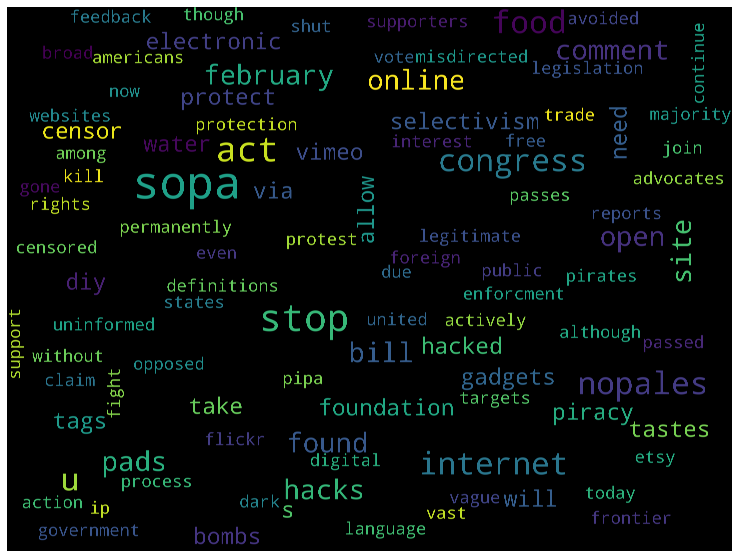

In [43]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width=4000,
    height=3000,
    scale=10,
    max_font_size=250,
    max_words=100,
    background_color="black",
).generate(str(words))
plt.figure(figsize=[35, 10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()